## **Personalities (WIP Title)**
### A better way to get big five personalities

Data source:
https://www.kaggle.com/tunguz/big-five-personality-test

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load data

data = pd.read_csv("data/data-final.csv", sep="\t")

In [5]:
data.shape

(1015341, 110)

In [15]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [16]:
raw_answr = data[list(data.columns)[:50]]
time_elps = data[list(data.columns)[50:100]]
usr_dta = data[list(data.columns)[100:]]
del data

### **Exploratory data analysis**

There are 1783 rows that are missing all answers - these will be removed.

In [17]:
# missing data - seem to be in same rows?
raw_answr.isna().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [18]:
raw_answr.isna().sum() == raw_answr[raw_answr[["EXT1"]].isna().EXT1].isna().sum()

EXT1     True
EXT2     True
EXT3     True
EXT4     True
EXT5     True
EXT6     True
EXT7     True
EXT8     True
EXT9     True
EXT10    True
EST1     True
EST2     True
EST3     True
EST4     True
EST5     True
EST6     True
EST7     True
EST8     True
EST9     True
EST10    True
AGR1     True
AGR2     True
AGR3     True
AGR4     True
AGR5     True
AGR6     True
AGR7     True
AGR8     True
AGR9     True
AGR10    True
CSN1     True
CSN2     True
CSN3     True
CSN4     True
CSN5     True
CSN6     True
CSN7     True
CSN8     True
CSN9     True
CSN10    True
OPN1     True
OPN2     True
OPN3     True
OPN4     True
OPN5     True
OPN6     True
OPN7     True
OPN8     True
OPN9     True
OPN10    True
dtype: bool

In [19]:
# Remove these rows
# These seem to be data recording issue, nothing we can do about these
raw_answr.dropna(inplace=True)

We are looking at the answers themselves here. No major issues, but the 0s are confusion as there are only 5 options on the website. Are they indicating skipped questions? If so, can do two things here: first, leave them, since they indicate something about the subject; second, interpolate the answers, which can make certain procedures easier but introduces new assumptions.

If people are skipping questions at random, then interpolating should work. If not, then we have to think of other things to account for this. For starters, my concern with 0 is that they indicate an answer category of its own, completely different from the 1-5 scale. In other words, 0 can indicate a number of things, but if we put in the same scale with the other numbers, it can seem as if 0 indicates more disagreeness than strongly disagree. Therefore, predicting the output can be a challenge.

In [20]:
# Aggregate answers
raw_answr.apply(pd.Series.value_counts)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0.0,3720,6099,6075,6893,9781,6183,8179,6372,6845,6261,...,9201,5942,7588,6661,7682,8128,8468,8026,7692,6177
1.0,249711,210104,76730,102032,98458,266568,236795,78165,173361,76504,...,43885,380019,23623,413679,16295,467713,15443,104034,19947,16599
2.0,199165,235528,191723,208184,178508,338198,227788,175759,221323,158282,...,102456,317600,72640,301853,59380,308248,56429,198347,56683,63589
3.0,288622,244683,269135,280161,234463,191408,194827,229962,214960,191349,...,251362,186185,174477,189074,273047,118871,181066,252198,128099,212145
4.0,191638,190216,284124,257148,299214,139539,197374,274953,242310,268237,...,331967,88755,314183,69056,395637,73520,401972,286486,344402,343342
5.0,80702,126928,185771,159140,193134,71662,148595,248347,154759,312925,...,274687,35057,421047,33235,261517,37078,350180,164467,456735,371706


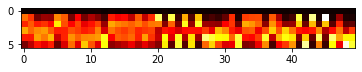

In [21]:
# Visualize answers in a grid
plt.imshow(raw_answr.apply(pd.Series.value_counts), cmap="hot")

The 5 groups of questions seem to be correlated internally as can be seen below. However, be do observe some questions that correlate with other questions outside of its own group. This is evidence for the big five personalities not being independent of each other. For example, extroversion seems to be correlated with aggression.

In [22]:
raw_answr.corr().style.background_gradient(cmap='coolwarm')

For the observations with a 0 answer, I have two main hypotheses as to the mechanism of their missingness:

1. Missingness has nothing to do with the questions themselves. Some people are careless when they take surveys and randomly misses questions.
2. Missingness has to do with questions themselves. Some questions are just sensitive and people don't want to answer them.

1 should be fine to our model if true since it is still MAR and interpolation should be less of an issue. 2 is the problematic one and we will try to get some idea as to whether it is true.

In [23]:
# make a boolean count of 0s
(raw_answr==0.0).corr().style.background_gradient(cmap='coolwarm')

In [24]:
# Total number of 0s per row
(raw_answr==0.0).apply(sum, axis=1).value_counts()

0     874434
1     106937
2      19618
3       4911
50      2094
4       1620
5        670
6        329
49       320
7        169
48       132
47       103
46       100
8         98
43        95
41        95
44        95
45        94
40        91
42        78
9         76
23        68
33        65
31        62
10        62
37        61
32        60
38        59
25        58
35        57
29        56
12        52
26        51
28        50
36        46
13        45
39        44
11        44
30        43
21        40
14        40
27        40
34        39
24        39
22        36
20        32
15        32
19        32
18        31
16        29
17        26
dtype: int64

There are two things to note here:

1. The vast vast majority of people skip only one or two questions, if they skip at all.
2. People are more likely to skip questions towards the end of each question group - questions 8, 9, and 10 tend to be skipped together.

It looks like we would do pretty good with interpolating and dropping some observations with too many skipped questions. But before we do that, I'd like to check for those people who skip 1 or 2 questions, are they more likely to skip certain questions than others.

In [25]:
raw_answr_0 = raw_answr==0.0

In [26]:
answr_0_cts = (raw_answr==0.0).apply(sum, axis=1)

In [27]:
raw_answr_0[answr_0_cts==1].apply(sum, axis=0).sort_values(ascending=False)[:10]

CSN1     6330
EST6     4244
EST4     4145
AGR6     4101
EST2     3960
AGR2     3895
OPN1     3885
EXT5     3539
EST1     3204
CSN10    2812
dtype: int64

In [28]:
raw_answr_0[answr_0_cts==2].apply(sum, axis=0).sort_values(ascending=False)[:10]

CSN1    1924
EST4    1473
EXT5    1438
EST6    1413
AGR2    1406
EST2    1387
OPN1    1383
AGR6    1304
EST1    1054
OPN7     951
dtype: int64

In [29]:
set(raw_answr_0[answr_0_cts==1].apply(sum, axis=0).sort_values(ascending=False)[:10].index).intersection(set(raw_answr_0[answr_0_cts==2].apply(sum, axis=0).sort_values(ascending=False)[:10].index))

{'AGR2', 'AGR6', 'CSN1', 'EST1', 'EST2', 'EST4', 'EST6', 'EXT5', 'OPN1'}

Interestingly, 9 questions appeared in the top 10 most skipped questions for both groups. This could be either due to non-question content factors, such as the position of the question, or due to the questions' content, for example, being worded too strongly.

These questions are:

1. AGR2 - I am interested in people.
2. AGR6 - I have a soft heart.
3. CSN1 - I am always prepared.
4. EST1 - I get stressed out easily.
5. EST2 - I am relaxed most of the time.
6. EST4 - I seldom feel blue.
7. EST6 - I get upset easily.
8. EXT5 - I start conversations.
9. OPN1 - I have a rich vocabulary.

I don't want to overanalyze here and I don't really see anything about these questions that are radically different from the others.

To conclude, given that I have found that the overwhelming majority of people skipped at most 2 questions, and finding no obvious connections between questions skipped and hidden personality traits, I will proceed to prepare the data using the following steps:

1. Drop any rows with more than 2 answers of 0s
2. Interpolate the 0s to transform them to an integer value between 1-5. Will try several ways

### **Data Preprocessing**

We will simply drop all non-complete answers due to limits in computational power.

In [30]:
raw_answr = raw_answr[answr_0_cts==0]

In [33]:
# raw_answr.to_csv("data/data_complete_only.csv", index=False)
# raw_answr = pd.read_csv("data/data_complete_only.csv")

In [6]:
raw_answr = pd.read_csv("data/data_complete_only.csv")

In [7]:
raw_answr.shape

(874434, 50)

In [5]:
mapping = {1.0: -0.9, 2.0: -0.4, 3.0: -0.1, 4.0: 0.4, 5.0:0.9}
data_new = np.zeros(raw_answr.shape)
for r in range(data_new.shape[0]):
    for c in range(data_new.shape[1]):
        data_new[r,c] = mapping[raw_answr.iloc[r,c]]

In [6]:
pd.DataFrame(data_new, columns = raw_answr.columns).to_csv("data/data_complete_only.csv", index=False)